In [1]:
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA, FactorAnalysis
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

In [3]:
Xc = X-np.mean(X, axis=0)

In [4]:
S = np.cov(Xc.T)

In [5]:
np.corrcoef(Xc.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [6]:
FactorAnalysis?

In [7]:
U,D,_ = np.linalg.svd(S)

In [8]:
U

array([[-0.36138659, -0.65658877,  0.58202985,  0.31548719],
       [ 0.08452251, -0.73016143, -0.59791083, -0.3197231 ],
       [-0.85667061,  0.17337266, -0.07623608, -0.47983899],
       [-0.3582892 ,  0.07548102, -0.54583143,  0.75365743]])

In [9]:
D

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [10]:
W = U@np.diag(np.sqrt(D))
print(W)

[[-0.743108   -0.32344628  0.16277024  0.04870686]
 [ 0.17380102 -0.35968937 -0.16721151 -0.04936083]
 [-1.76154511  0.08540619 -0.02132015 -0.07408051]
 [-0.73673893  0.03718318 -0.15264701  0.11635429]]


In [11]:
W1 = U[:,0]*np.sqrt(D[0])
W1 = W1.reshape((4,1))
print(W1)
np.abs(W1@W1.T-S).sum()

[[-0.743108  ]
 [ 0.17380102]
 [-1.76154511]
 [-0.73673893]]


0.714158841282216

In [12]:
W2 = U[:,1]*np.sqrt(D[1])
W2 = W2.reshape((4,1))
np.abs(W1@W1.T+W2@W2.T-S).sum()

0.2785379811406326

In [13]:
W3 = U[:,2]*np.sqrt(D[2])
W3 = W3.reshape((4,1))
np.abs(W1@W1.T+W2@W2.T+W3@W3.T-S).sum()

0.08323368831023208

In [14]:
W@W.T-S

array([[-4.44089210e-16, -6.24500451e-17, -4.44089210e-16,
        -2.22044605e-16],
       [-6.24500451e-17, -1.38777878e-16,  0.00000000e+00,
         4.16333634e-17],
       [-4.44089210e-16,  0.00000000e+00, -8.88178420e-16,
         0.00000000e+00],
       [-2.22044605e-16,  4.16333634e-17,  0.00000000e+00,
        -1.11022302e-16]])

In [15]:
W1 = U[:,:2]@np.diag(np.sqrt(D[:2]))
print(W1.shape)

(4, 2)


In [16]:
W1@W1.T-S

array([[-0.02886651,  0.02962127,  0.00707852,  0.01917914],
       [ 0.02962127, -0.03039618, -0.00722165, -0.01978099],
       [ 0.00707852, -0.00722165, -0.00594247,  0.00536513],
       [ 0.01917914, -0.01978099,  0.00536513, -0.03683943]])

In [17]:
trans = FactorAnalysis(n_components=2, random_state=1)

In [18]:
X_t = trans.fit_transform(X)
X_t.shape

(150, 2)

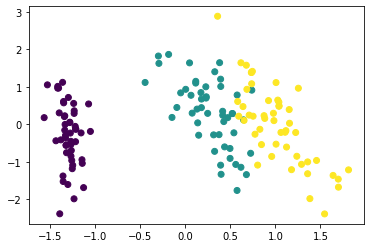

In [19]:
plt.scatter(X_t[:,0],X_t[:,1], c=y)

In [20]:
X_t2 = Xc@W1

In [21]:
X_t2

array([[ 5.51928399e+00, -1.57340267e-01],
       [ 5.58100509e+00,  8.71936758e-02],
       [ 5.94054140e+00,  7.14044395e-02],
       [ 5.64516308e+00,  1.56799242e-01],
       [ 5.61097490e+00, -1.60964576e-01],
       [ 4.69006068e+00, -3.65191409e-01],
       [ 5.79978400e+00,  4.40701298e-02],
       [ 5.40006018e+00, -8.04860825e-02],
       [ 5.93517899e+00,  2.84885755e-01],
       [ 5.49590457e+00,  5.60470398e-02],
       [ 5.15495729e+00, -3.17771408e-01],
       [ 5.37252727e+00, -7.25620707e-03],
       [ 5.72898978e+00,  1.15819987e-01],
       [ 6.62900731e+00,  2.51921272e-01],
       [ 5.43831792e+00, -5.80678589e-01],
       [ 4.90633781e+00, -6.59151218e-01],
       [ 5.39467873e+00, -3.99353884e-01],
       [ 5.44561010e+00, -1.53621949e-01],
       [ 4.52342207e+00, -4.29974675e-01],
       [ 5.32159590e+00, -2.52988142e-01],
       [ 4.75050796e+00, -1.92783359e-01],
       [ 5.23054190e+00, -2.13300887e-01],
       [ 6.61283614e+00, -6.57485370e-02],
       [ 4.

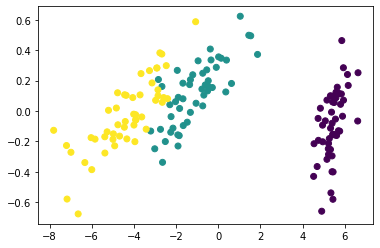

In [22]:
plt.scatter(X_t2[:,0],X_t2[:,1],c=y)

In [23]:
W1

array([[-0.743108  , -0.32344628],
       [ 0.17380102, -0.35968937],
       [-1.76154511,  0.08540619],
       [-0.73673893,  0.03718318]])

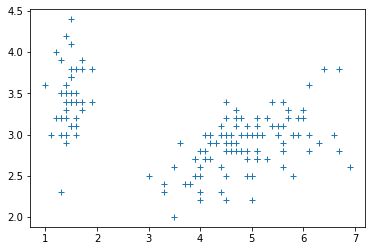

In [24]:
plt.plot(X[:,2],X[:,1],'+')

In [25]:
Psi = np.diag(S-W@W.T)
Ginv = (np.identity(4) + W.T@np.diag(1./Psi)@W)
Z = np.linalg.solve(Ginv, W.T@np.diag(1./Psi)@Xc.T)

In [26]:
Z.shape

(4, 150)

In [27]:
Z = Z.T

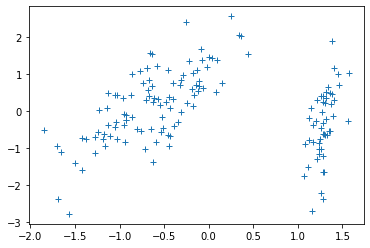

In [28]:
plt.plot(Z[:,0],Z[:,1],'+')

In [29]:
trans.get_covariance()

array([[ 0.68126364, -0.04284633,  1.26570894,  0.51508603],
       [-0.04284633,  0.1886676 , -0.32646537, -0.14309414],
       [ 1.26570894, -0.32646537,  3.09553209,  1.2866423 ],
       [ 0.51508603, -0.14309414,  1.2866423 ,  0.57713221]])

In [30]:
trans.fit_transform?

In [31]:
np.corrcoef(X_t.T)

array([[1.00000000e+00, 5.70609201e-14],
       [5.70609201e-14, 1.00000000e+00]])